# **Start**

In [1]:
import io
import pandas as pd
#import numpy for linear algebra operations
import numpy as np
#import matplotlib for data visualization and graphical plotting
from matplotlib import pyplot as plt
#import seaborn for data visualization for statistical graphics plotting
import seaborn as sns
#import pickle for serializing and de-serializing python object structures
import pickle
import math

#for data split : training and testing (here, validation)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#for statitics of results obtained
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#importing various ML methods to train data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from google.colab import files
uploaded = files.upload()
column_data = pd.read_csv(io.BytesIO(uploaded['Metadata_LASI-DAD.csv']))
#column_data
col_name = np.array(column_data['variable'])
#col_name

Saving Metadata_LASI-DAD.csv to Metadata_LASI-DAD.csv


In [3]:
from google.colab import files
uploaded = files.upload()
full_data = pd.read_csv(io.BytesIO(uploaded['H_DAD_w1a3.csv']))
#full_data

Saving H_DAD_w1a3.csv to H_DAD_w1a3.csv


In [4]:
from google.colab import files
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['processed_filled.csv']))
#train_data

Saving processed_filled.csv to processed_filled.csv


In [5]:
def printinfo(data):
    temp = pd.DataFrame(index = data.columns)
    temp['data_type'] = data.dtypes
    temp['null_count'] = data.isnull().sum()
    display(temp)

# **Preprocessing**

In [6]:
def preprocess(train_data, full_data, col_name):
  train_data['r1agey'] = full_data['r1agey']
  train_data['r1prs_topkun'] = full_data['r1prs_topkun']
  train_data['r1prs_pc4'] = full_data['r1prs_pc4']
  train_data['r1cdr_incon'] = full_data['r1cdr_incon']
  train_data['r1prs_pc5'] = full_data['r1prs_pc5']
  train_data['r1obshouse'] = full_data['r1obshouse']
  train_data['r1rs7412'] = full_data['r1rs7412']
  train_data['r1obsnoise'] = full_data['r1obsnoise']
  train_data['r1prs_topcog'] = full_data['r1prs_topcog']
  train_data['r1cdr_final'] = full_data['r1cdr_final']
  train_data['r1obsodor'] = full_data['r1obsodor']
  train_data['r1obsair'] = full_data['r1obsair']
  train_data['r1prs_pc3'] = full_data['r1prs_pc3']
  train_data['r1rs429358'] = full_data['r1rs429358']
  train_data['r1prs_pc1'] = full_data['r1prs_pc1']
  train_data['r1spice'] = full_data['r1spice']
  train_data['raedyrs'] = full_data['raedyrs']
  train_data['r1prs_topjan'] = full_data['r1prs_topjan']
  train_data['r1prs_pc2'] = full_data['r1prs_pc2']
  train_data['r1location'] = full_data['r1location']
  train_data['r1prs_toplam'] = full_data['r1prs_toplam']
  train_data['ragender'] = full_data['ragender']
  training_data = train_data[col_name]
  training_data = training_data.fillna(-1)
  del training_data['r1cdr_incon']
  return training_data

In [7]:
training_data = preprocess(train_data, full_data, col_name)
training_data

,prim_key,r1agey,ragender,raedyrs,h1rural,r1location,r1wtresp,r1obsnoise,r1obsodor,r1obsair,r1obshouse,r1borient,r1bexefu,r1blangf,r1bmemory,r1bvsp,r1nmemimm,r1nmemdel,r1nmemrec,r1nreason,r1natnspd,r1sgcp,r1hmse_scorz,r1word_totaz,r1word_dz,r1wre_scorez,r1log_recoz,r1bm_immexz,r1bm_reclexz,r1verbalz,r1csid_scorz,r1rv_scorez,r1cog_totalz,r1i_hear,r1i_sleep,r1systo,r1diasto,r1pulse,r1bphigh,r1mheight,r1mweight,r1mbmi,r1bmicat,r1adla_d,r1iadltot1_d,r1cesd10,r1anx5,r1mna_scale,r1spice,r1hear_r,r1hear_l,r1hear_aid,r1prs_toplam,r1prs_topkun,r1prs_topjan,r1prs_topcog,r1prs_pc1,r1prs_pc2,r1prs_pc3,r1prs_pc4,r1prs_pc5,r1rs7412,r1rs429358,r1cdr_final
0,1.010000e+14,68,2,0,1,2,0.484271,-1.0,-1.0,-1.0,-1.0,1.212536,-1.010781,0.147914,-0.632348,-1.910552,-0.156025,-0.454087,-1.064866,-1.379529,-0.581117,-0.480311,0.074081,-0.096435,0.397481,-1.680023,-2.375595,-0.046611,-0.738371,1.896792,0.686572,-0.447691,-0.345135,0.766917,1.353125,2.701283,2.879588,1.216861,1.096511,-0.356429,0.655815,0.955338,1.008674,-0.798612,0.292360,0.559189,0.383569,1.198075,-1.0,0.133987,0.792040,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5
1,1.010000e+14,69,2,0,1,2,-0.284237,-1.0,-1.0,-1.0,-1.0,-2.204774,-1.606555,-1.645568,-1.391039,-0.884223,-1.777544,-1.383460,0.374985,-1.600285,-1.286055,-1.932946,-2.282337,-1.270281,-1.329469,-1.680023,-0.147494,-1.278338,-0.738371,-2.475944,-0.526629,-1.050995,-1.893202,-0.930366,1.353125,0.313175,0.120177,1.373926,1.096511,-0.645605,-1.186377,-0.610361,-0.554608,-0.798612,1.594513,0.744560,-0.232412,-0.756372,-1.0,-0.653059,0.792040,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,1.010000e+14,61,1,10,1,2,0.604934,-1.0,-1.0,-1.0,-1.0,1.212536,-0.142308,0.563687,0.070145,1.068803,0.641127,-0.420292,0.532354,-0.838283,0.468456,0.441080,0.799132,1.077411,-0.034257,0.841551,0.489107,-0.046611,-0.738371,1.678155,-0.526629,-0.146039,0.502703,0.766917,0.323708,0.006446,-0.332860,-0.942781,-0.911756,0.278611,-0.201368,-0.366011,-0.158987,2.487176,1.594513,1.486043,0.075578,-1.366296,-1.0,1.708077,1.559219,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5
3,1.010000e+14,61,1,0,1,2,0.600905,-1.0,-1.0,-1.0,-1.0,-2.990363,-2.100478,-3.826531,-2.292311,-1.910552,-2.412544,-1.563702,-3.601887,-2.172907,-1.575260,-3.168594,-3.913703,-2.248486,-1.329469,-4.481773,-2.375595,-1.278338,-0.738371,-2.475944,-4.166230,-2.257604,-3.742814,2.245092,1.626308,1.824913,1.602846,-0.118190,1.096511,-1.601020,-1.293361,-0.634741,-0.496854,4.320914,4.575097,4.380948,3.333670,-4.034716,-1.0,-1.971600,-1.871389,0.400807,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0
4,1.010000e+14,69,1,8,1,2,0.612809,-1.0,-1.0,-1.0,-1.0,1.212536,1.543163,1.241470,0.564491,1.175637,1.000583,-0.026012,0.122018,1.053274,1.925326,1.393470,0.617869,0.881770,-0.465994,0.841551,-0.147494,1.800981,1.745199,1.022244,0.686572,0.155613,1.057464,1.615559,-1.735126,-0.716560,-1.321305,-2.081502,-0.911756,1.231169,0.152032,-0.459632,-0.158987,-0.798612,-0.575743,0.744560,-0.848393,-0.369041,-1.0,0.921032,0.024861,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,1.362430e+14,80,2,0,0,2,-0.663388,-1.0,-1.0,-1.0,-1.0,-1.449873,-0.491669,-0.550781,-0.778050,-0.138784,-0.786490,-0.803306,0.169082,0.295754,-1.367996,-0.758225,-1.376023,-0.487717,-0.897731,0.561376,-0.465794,-1.278338,-0.738371,0.803608,0.686572,-1.654300,-0.717989,0.766917,2.382542,0.641814,0.902697,-0.235989,1.096511,-1.869941,-1.772871,-1.276004,-1.326649,0.844282,0.726411,-0.367666,3.155483,-2.506017,-1.0,-0.653059,-0.742318,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.5
4092,1.362430e+14,65,1,9,0,2,-0.683246,-1.0,-1.0,-1.0,-1.0,1.212536,1.176

In [8]:
def preprocessing(training_data):
    import math
    from sklearn import preprocessing
    labels = training_data[['r1cdr_final']]
    labelsencoded = labels.apply(preprocessing.LabelEncoder().fit_transform)
    training_data = training_data.drop(columns=['prim_key', 'r1cdr_final'])
    training_data2 = training_data.apply(preprocessing.LabelEncoder().fit_transform) 

    X_train, X_val,Y_train, Y_val = train_test_split(training_data,labelsencoded,test_size=0.25,random_state=40)
    X_train2, X_val2,Y_train2, Y_val2 = train_test_split(training_data2,labelsencoded,test_size=0.25,random_state=40)

    return training_data, X_train, X_val, Y_train, Y_val, training_data2, X_train2, X_val2, Y_train2, Y_val2, labelsencoded

## **training_data is the raw data (with int/float values)**
## **training_data2 is label encoded data (with encoded values (int))**

In [9]:
training_data, X_train, X_val, Y_train, Y_val, training_data2, X_train2, X_val2, Y_train2, Y_val2, labelsencoded = preprocessing(training_data)
display(training_data)
display(training_data2)
display(labelsencoded)

,r1agey,ragender,raedyrs,h1rural,r1location,r1wtresp,r1obsnoise,r1obsodor,r1obsair,r1obshouse,r1borient,r1bexefu,r1blangf,r1bmemory,r1bvsp,r1nmemimm,r1nmemdel,r1nmemrec,r1nreason,r1natnspd,r1sgcp,r1hmse_scorz,r1word_totaz,r1word_dz,r1wre_scorez,r1log_recoz,r1bm_immexz,r1bm_reclexz,r1verbalz,r1csid_scorz,r1rv_scorez,r1cog_totalz,r1i_hear,r1i_sleep,r1systo,r1diasto,r1pulse,r1bphigh,r1mheight,r1mweight,r1mbmi,r1bmicat,r1adla_d,r1iadltot1_d,r1cesd10,r1anx5,r1mna_scale,r1spice,r1hear_r,r1hear_l,r1hear_aid,r1prs_toplam,r1prs_topkun,r1prs_topjan,r1prs_topcog,r1prs_pc1,r1prs_pc2,r1prs_pc3,r1prs_pc4,r1prs_pc5,r1rs7412,r1rs429358
0,68,2,0,1,2,0.484271,-1.0,-1.0,-1.0,-1.0,1.212536,-1.010781,0.147914,-0.632348,-1.910552,-0.156025,-0.454087,-1.064866,-1.379529,-0.581117,-0.480311,0.074081,-0.096435,0.397481,-1.680023,-2.375595,-0.046611,-0.738371,1.896792,0.686572,-0.447691,-0.345135,0.766917,1.353125,2.701283,2.879588,1.216861,1.096511,-0.356429,0.655815,0.955338,1.008674,-0.798612,0.292360,0.559189,0.383569,1.198075,-1.0,0.133987,0.792040,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,69,2,0,1,2,-0.284237,-1.0,-1.0,-1.0,-1.0,-2.204774,-1.606555,-1.645568,-1.391039,-0.884223,-1.777544,-1.383460,0.374985,-1.600285,-1.286055,-1.932946,-2.282337,-1.270281,-1.329469,-1.680023,-0.147494,-1.278338,-0.738371,-2.475944,-0.526629,-1.050995,-1.893202,-0.930366,1.353125,0.313175,0.120177,1.373926,1.096511,-0.645605,-1.186377,-0.610361,-0.554608,-0.798612,1.594513,0.744560,-0.232412,-0.756372,-1.0,-0.653059,0.792040,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,61,1,10,1,2,0.604934,-1.0,-1.0,-1.0,-1.0,1.212536,-0.142308,0.563687,0.070145,1.068803,0.641127,-0.420292,0.532354,-0.838283,0.468456,0.441080,0.799132,1.077411,-0.034257,0.841551,0.489107,-0.046611,-0.738371,1.678155,-0.526629,-0.146039,0.502703,0.766917,0.323708,0.006446,-0.332860,-0.942781,-0.911756,0.278611,-0.201368,-0.366011,-0.158987,2.487176,1.594513,1.486043,0.075578,-1.366296,-1.0,1.708077,1.559219,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,61,1,0,1,2,0.600905,-1.0,-1.0,-1.0,-1.0,-2.990363,-2.100478,-3.826531,-2.292311,-1.910552,-2.412544,-1.563702,-3.601887,-2.172907,-1.575260,-3.168594,-3.913703,-2.248486,-1.329469,-4.481773,-2.375595,-1.278338,-0.738371,-2.475944,-4.166230,-2.257604,-3.742814,2.245092,1.626308,1.824913,1.602846,-0.118190,1.096511,-1.601020,-1.293361,-0.634741,-0.496854,4.320914,4.575097,4.380948,3.333670,-4.034716,-1.0,-1.971600,-1.871389,0.400807,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,69,1,8,1,2,0.612809,-1.0,-1.0,-1.0,-1.0,1.212536,1.543163,1.241470,0.564491,1.175637,1.000583,-0.026012,0.122018,1.053274,1.925326,1.393470,0.617869,0.881770,-0.465994,0.841551,-0.147494,1.800981,1.745199,1.022244,0.686572,0.155613,1.057464,1.615559,-1.735126,-0.716560,-1.321305,-2.081502,-0.911756,1.231169,0.152032,-0.459632,-0.158987,-0.798612,-0.575743,0.744560,-0.848393,-0.369041,-1.0,0.921032,0.024861,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,80,2,0,0,2,-0.663388,-1.0,-1.0,-1.0,-1.0,-1.449873,-0.491669,-0.550781,-0.778050,-0.138784,-0.786490,-0.803306,0.169082,0.295754,-1.367996,-0.758225,-1.376023,-0.487717,-0.897731,0.561376,-0.465794,-1.278338,-0.738371,0.803608,0.686572,-1.654300,-0.717989,0.766917,2.382542,0.641814,0.902697,-0.235989,1.096511,-1.869941,-1.772871,-1.276004,-1.326649,0.844282,0.726411,-0.367666,3.155483,-2.506017,-1.0,-0.653059,-0.742318,-0.084613,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4092,65,1,9,0,2,-0.683246,-1.0,-1.0,-1.0,-1.0,1.212536,1.176280,0.619041,0.249150,1.328086,0.585565,0.314195,-0.036821,1.001726,1.232439,1.156174,1.161658,0.490488,-0.034257,1.121726,-0.784094,0.569253,-0

,r1agey,ragender,raedyrs,h1rural,r1location,r1wtresp,r1obsnoise,r1obsodor,r1obsair,r1obshouse,r1borient,r1bexefu,r1blangf,r1bmemory,r1bvsp,r1nmemimm,r1nmemdel,r1nmemrec,r1nreason,r1natnspd,r1sgcp,r1hmse_scorz,r1word_totaz,r1word_dz,r1wre_scorez,r1log_recoz,r1bm_immexz,r1bm_reclexz,r1verbalz,r1csid_scorz,r1rv_scorez,r1cog_totalz,r1i_hear,r1i_sleep,r1systo,r1diasto,r1pulse,r1bphigh,r1mheight,r1mweight,r1mbmi,r1bmicat,r1adla_d,r1iadltot1_d,r1cesd10,r1anx5,r1mna_scale,r1spice,r1hear_r,r1hear_l,r1hear_aid,r1prs_toplam,r1prs_topkun,r1prs_topjan,r1prs_topcog,r1prs_pc1,r1prs_pc2,r1prs_pc3,r1prs_pc4,r1prs_pc5,r1rs7412,r1rs429358
0,8,1,0,1,1,2541,0,0,0,0,441,390,935,725,0,677,224,70,92,108,855,23,11,4,10,0,2,0,20,4,6,1425,13,1605,307,214,185,67,296,491,3404,318,5,21,104,38,508,0,152,181,7,161,149,147,158,108,66,43,98,134,0,0
1,9,1,0,1,1,1493,0,0,0,0,9,70,188,226,1,62,5,122,43,6,71,10,5,0,10,7,0,0,0,3,4,161,0,1605,169,115,189,67,209,135,1191,65,5,30,117,18,184,0,30,181,7,161,149,147,158,108,66,43,98,134,0,0
2,1,0,10,1,1,2939,0,0,0,0,441,1008,1057,1287,10,1127,235,126,281,480,1531,27,17,3,19,9,2,0,19,3,7,2775,13,1216,148,90,44,16,483,328,1549,136,33,30,164,26,87,0,183,182,7,161,149,147,158,108,66,43,98,134,0,0
3,1,0,0,1,1,2833,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,18,1608,260,171,84,67,74,119,1150,74,36,41,208,94,2,0,1,1,158,161,149,147,158,108,66,43,98,134,0,0
4,9,0,8,1,1,3071,0,0,0,0,441,2073,1173,1653,11,1304,422,114,1288,876,2123,26,16,2,19,7,5,4,16,4,8,3518,17,0,95,46,15,16,631,396,1409,136,5,7,117,3,254,0,182,132,7,161,149,147,158,108,66,43,98,134,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,20,1,0,0,1,1323,0,0,0,0,70,748,658,610,3,382,105,116,920,4,643,15,9,1,18,6,0,0,15,4,2,940,13,1610,192,146,69,67,49,46,282,4,22,25,29,93,21,0,30,28,7,161,149,147,158,108,66,43,98,134,0,0
4092,5,0,9,0,1,1030,0,0,0,0,441,1882,1071,1425,12,1098,598,110,1268,755,1993,29,14,3,20,5,3,0,7,3,3,1719,13,1610,186,142,57,67,677,576,2649,136,19,7,144,88,28,0,30,28,7,161,149,147,158,108,66,43,98,134,0,0
4093,2,0,0,0,1,2108,0,0,0,0,329,1135,1169,1922,1,1358,927,122,1119,116,1345,21,17,5,20,7,4,2,22,4,3,3309,0,7,202,166,30,67,543,490,2779,136,5,3,3,3,411,0,182,181,7,161,149,147,158,108,66,43,98,134,0,0
4094,0,1,5,0,1,156,0,0,0,0,243,493,723,300,1,261,34,26,514,10,502,19,6,0,10,7,1,0,7,3,6,442,17,1605,69,105,240,16,586,556,3141,318,22,29,154,75,128,0,5,4,7,161,149,147,158,108,66,43,98,134,0,0


,r1cdr_final
0,2
1,3
2,2
3,4
4,2
...,...
4091,2
4092,1
4093,1
4094,2


#**Logistic Regression**

## **Raw data (after filling NaNs)**

In [10]:
model1 = LogisticRegression()
print("Model 1 : Logistic Regression", "\n")
model1.fit(X_train, Y_train)
prediction = model1.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 1 : Logistic Regression 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of the model : 0.7802734375 

Confusion matrix : 
 [[380   6  25   2   0]
 [  1 101  71   0   0]
 [ 12  59 311   9   1]
 [  0   1  33   7   0]
 [  0   0   1   4   0]] 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       413
           1       0.60      0.58      0.59       173
           2       0.71      0.79      0.75       392
           3       0.32      0.17      0.22        41
           4       0.00      0.00      0.00         5

    accuracy                           0.78      1024
   macro avg       0.52      0.49      0.50      1024
weighted avg       0.77      0.78      0.78      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **Encoded data**

In [11]:
modela1 = LogisticRegression()
print("Model 1 : Logistic Regression", "\n")
modela1.fit(X_train2, Y_train2)
prediction = modela1.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 1 : Logistic Regression 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of the model : 0.65625 

Confusion matrix : 
 [[284  38  87   4   0]
 [  6  94  73   0   0]
 [ 39  56 290   5   2]
 [  8   0  29   4   0]
 [  0   0   2   3   0]] 

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       413
           1       0.50      0.54      0.52       173
           2       0.60      0.74      0.66       392
           3       0.25      0.10      0.14        41
           4       0.00      0.00      0.00         5

    accuracy                           0.66      1024
   macro avg       0.44      0.41      0.42      1024
weighted avg       0.67      0.66      0.65      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **LDA**

## **Raw data (after filling NaNs)**

In [12]:
model2 = LinearDiscriminantAnalysis()
print("Model 2 : LinearDiscriminantAnalysis (LDA)", "\n")
model2.fit(X_train, Y_train)
prediction = model2.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 2 : LinearDiscriminantAnalysis (LDA) 

Acurracy of the model : 0.765625 

Confusion matrix : 
 [[364   6  39   3   1   0]
 [  1 107  64   1   0   0]
 [ 11  68 303   6   3   1]
 [  0   1  31   7   2   0]
 [  0   0   1   1   3   0]
 [  0   0   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       413
           1       0.59      0.62      0.60       173
           2       0.69      0.77      0.73       392
           3       0.39      0.17      0.24        41
           4       0.33      0.60      0.43         5
           5       0.00      0.00      0.00         0

    accuracy                           0.77      1024
   macro avg       0.50      0.51      0.49      1024
weighted avg       0.77      0.77      0.77      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-de

## **Encoded data**

In [13]:
modela2 = LinearDiscriminantAnalysis()
print("Model 2 : LinearDiscriminantAnalysis (LDA)", "\n")
modela2.fit(X_train2, Y_train2)
prediction = modela2.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 2 : LinearDiscriminantAnalysis (LDA) 

Acurracy of the model : 0.765625 

Confusion matrix : 
 [[353  13  40   4   1   2]
 [  1 109  63   0   0   0]
 [ 11  61 308   7   4   1]
 [  0   1  26  11   2   1]
 [  0   0   1   1   3   0]
 [  0   0   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       413
           1       0.59      0.63      0.61       173
           2       0.70      0.79      0.74       392
           3       0.48      0.27      0.34        41
           4       0.30      0.60      0.40         5
           5       0.00      0.00      0.00         0

    accuracy                           0.77      1024
   macro avg       0.51      0.52      0.50      1024
weighted avg       0.78      0.77      0.77      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-de

# **K Neigbors Classifier**

## **Raw data (after filling NaNs)**

In [14]:
model3 = KNeighborsClassifier()
print("Model 3 : K Neighbors Classifier", "\n")
model3.fit(X_train, Y_train)
prediction = model3.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 3 : K Neighbors Classifier 

Acurracy of the model : 0.7177734375 

Confusion matrix : 
 [[356  10  44   2   1]
 [  2  87  84   0   0]
 [ 19  81 285   6   1]
 [  1   1  33   5   1]
 [  0   0   2   1   2]] 

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       413
           1       0.49      0.50      0.49       173
           2       0.64      0.73      0.68       392
           3       0.36      0.12      0.18        41
           4       0.40      0.40      0.40         5

    accuracy                           0.72      1024
   macro avg       0.56      0.52      0.53      1024
weighted avg       0.72      0.72      0.72      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## **Encoded data**

In [15]:
modela3 = KNeighborsClassifier()
print("Model 3 : K Neighbors Classifier", "\n")
modela3.fit(X_train2, Y_train2)
prediction = modela3.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 3 : K Neighbors Classifier 

Acurracy of the model : 0.5859375 

Confusion matrix : 
 [[288  42  82   0   1]
 [ 28  81  64   0   0]
 [ 58 100 227   7   0]
 [  9   0  27   3   2]
 [  1   0   2   1   1]] 

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       413
           1       0.36      0.47      0.41       173
           2       0.56      0.58      0.57       392
           3       0.27      0.07      0.12        41
           4       0.25      0.20      0.22         5

    accuracy                           0.59      1024
   macro avg       0.44      0.40      0.41      1024
weighted avg       0.59      0.59      0.59      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# **Decision Tree Classifier**

## **Raw data (after filling NaNs)**

In [31]:
model4 = DecisionTreeClassifier()
print("Model 4 : Decision Tree Classifier", "\n")
model4.fit(X_train, Y_train)
prediction = model4.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 4 : Decision Tree Classifier 

Acurracy of the model : 0.693359375 

Confusion matrix : 
 [[377  10  20   6   0]
 [  1  85  80   7   0]
 [ 25 106 237  24   0]
 [  4   3  22  10   2]
 [  0   0   2   2   1]] 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       413
           1       0.42      0.49      0.45       173
           2       0.66      0.60      0.63       392
           3       0.20      0.24      0.22        41
           4       0.33      0.20      0.25         5

    accuracy                           0.69      1024
   macro avg       0.51      0.49      0.49      1024
weighted avg       0.71      0.69      0.70      1024
 



### **Important features (importance > 1.5%)**

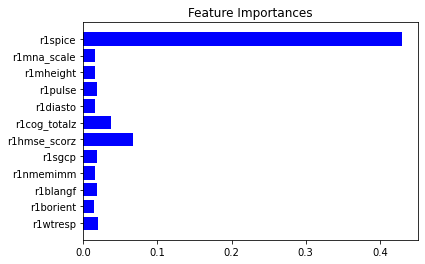

In [34]:
importance = model4.feature_importances_
import matplotlib.pyplot as plt
feature_name = np.delete(col_name, [0, 63, 64])
removal = []
for i in range(62):
  if importance[i] < 0.015:
    removal.append(i)
f_name = np.delete(feature_name, removal)
imp = np.delete(importance, removal)
plt.title('Feature Importances')
plt.barh(f_name,imp, color='b',align='center')
plt.show()

## **Encoded data**

In [35]:
modela4 = DecisionTreeClassifier()
print("Model 4 : Decision Tree Classifier", "\n")
modela4.fit(X_train2, Y_train2)
prediction = modela4.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 4 : Decision Tree Classifier 

Acurracy of the model : 0.6982421875 

Confusion matrix : 
 [[373  12  20   8   0]
 [  1  89  78   5   0]
 [ 24  98 242  26   2]
 [  3   5  21  10   2]
 [  0   0   2   2   1]] 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       413
           1       0.44      0.51      0.47       173
           2       0.67      0.62      0.64       392
           3       0.20      0.24      0.22        41
           4       0.20      0.20      0.20         5

    accuracy                           0.70      1024
   macro avg       0.49      0.50      0.49      1024
weighted avg       0.71      0.70      0.70      1024
 



### **Important features (importance > 1.5%)**

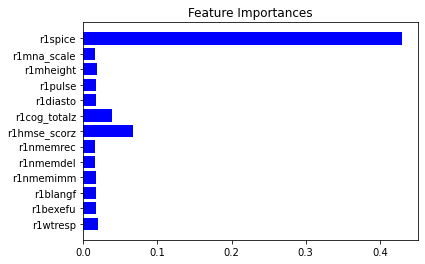

In [36]:
importance = modela4.feature_importances_
import matplotlib.pyplot as plt
feature_name = np.delete(col_name, [0, 63, 64])
removal = []
for i in range(62):
  if importance[i] < 0.015:
    removal.append(i)
f_name = np.delete(feature_name, removal)
imp = np.delete(importance, removal)
plt.title('Feature Importances')
plt.barh(f_name,imp, color='b',align='center')
plt.show()

# **Random Forest Classifier**

## **Raw data (after filling NaNs)**

In [37]:
model5 = RandomForestClassifier()
print("Model 5 : Random Forest Classifier", "\n")
model5.fit(X_train, Y_train)
prediction = model5.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 5 : Random Forest Classifier 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Acurracy of the model : 0.7958984375 

Confusion matrix : 
 [[392   3  17   1   0]
 [  1 101  71   0   0]
 [ 12  59 314   7   0]
 [  0   1  32   7   1]
 [  1   0   1   2   1]] 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       413
           1       0.62      0.58      0.60       173
           2       0.72      0.80      0.76       392
           3       0.41      0.17      0.24        41
           4       0.50      0.20      0.29         5

    accuracy                           0.80      1024
   macro avg       0.64      0.54      0.57      1024
weighted avg       0.79      0.80      0.79      1024
 



### **Important features (importance > 2%)**

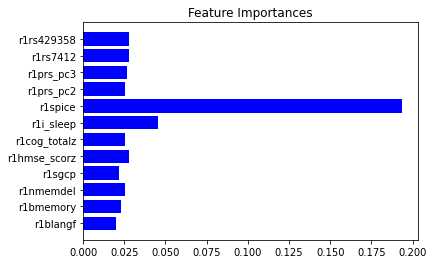

In [39]:
importance = model5.feature_importances_
import matplotlib.pyplot as plt
feature_name = np.delete(col_name, [0, 63, 64])
removal = []
for i in range(62):
  if importance[i] < 0.02:
    removal.append(i)
f_name = np.delete(feature_name, removal)
imp = np.delete(importance, removal)
plt.title('Feature Importances')
plt.barh(f_name,imp, color='b',align='center')
plt.show()

## **Encoded data**

In [40]:
modela5 = RandomForestClassifier()
print("Model 5 : Random Forest Classifier", "\n")
modela5.fit(X_train2, Y_train2)
prediction = modela5.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 5 : Random Forest Classifier 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Acurracy of the model : 0.8037109375 

Confusion matrix : 
 [[392   3  17   1   0]
 [  1 103  69   0   0]
 [ 12  53 320   7   0]
 [  0   1  33   6   1]
 [  0   0   1   2   2]] 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       413
           1       0.64      0.60      0.62       173
           2       0.73      0.82      0.77       392
           3       0.38      0.15      0.21        41
           4       0.67      0.40      0.50         5

    accuracy                           0.80      1024
   macro avg       0.68      0.58      0.61      1024
weighted avg       0.80      0.80      0.80      1024
 



### **Important features (importance > 2%)**

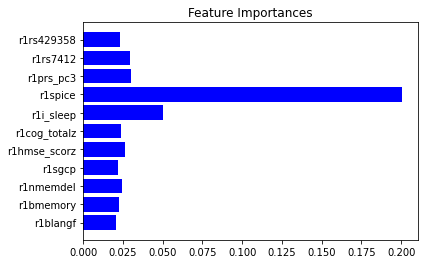

In [41]:
importance = modela5.feature_importances_
import matplotlib.pyplot as plt
feature_name = np.delete(col_name, [0, 63, 64])
removal = []
for i in range(62):
  if importance[i] < 0.02:
    removal.append(i)
f_name = np.delete(feature_name, removal)
imp = np.delete(importance, removal)
plt.title('Feature Importances')
plt.barh(f_name,imp, color='b',align='center')
plt.show()

# **Gaussian Naive Bayes**

## **Raw data (after filling NaNs)**

In [24]:
model6 = GaussianNB()
print("Model 6 : Gaussian Naive Bayes", "\n")
model6.fit(X_train, Y_train)
prediction = model6.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 6 : Gaussian Naive Bayes 

Acurracy of the model : 0.529296875 

Confusion matrix : 
 [[283  50  66   2  11   1]
 [  3  95  61   5   9   0]
 [  9  62 154  50 113   4]
 [  0   0   2   9  29   1]
 [  0   0   0   1   1   3]
 [  0   0   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       413
           1       0.46      0.55      0.50       173
           2       0.54      0.39      0.46       392
           3       0.13      0.22      0.17        41
           4       0.01      0.20      0.01         5
           5       0.00      0.00      0.00         0

    accuracy                           0.53      1024
   macro avg       0.35      0.34      0.32      1024
weighted avg       0.68      0.53      0.59      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-de

## **Encoded data**

In [25]:
modela6 = GaussianNB()
print("Model 6 : Gaussian Naive Bayes", "\n")
modela6.fit(X_train2, Y_train2)
prediction = modela6.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 6 : Gaussian Naive Bayes 

Acurracy of the model : 0.560546875 

Confusion matrix : 
 [[280  55  66   4   8   0]
 [  3 103  56   7   4   0]
 [  9  77 178  68  60   0]
 [  0   0   5  11  24   1]
 [  0   0   0   1   2   2]
 [  0   0   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.96      0.68      0.79       413
           1       0.44      0.60      0.50       173
           2       0.58      0.45      0.51       392
           3       0.12      0.27      0.17        41
           4       0.02      0.40      0.04         5
           5       0.00      0.00      0.00         0

    accuracy                           0.56      1024
   macro avg       0.35      0.40      0.34      1024
weighted avg       0.69      0.56      0.61      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-de

# **SVM**

## **Raw data (after filling NaNs)**

In [26]:
model7 = SVC(gamma='auto')
print("Model 7 : Support Vector Machine (SVM)", "\n")
model7.fit(X_train, Y_train)
prediction = model7.predict(X_val)
print("Acurracy of the model :", accuracy_score(Y_val, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val, prediction), "\n")
print(classification_report(Y_val, prediction), "\n")

Model 7 : Support Vector Machine (SVM) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of the model : 0.77734375 

Confusion matrix : 
 [[383   4  26   0   0]
 [  1  92  80   0   0]
 [ 13  56 320   3   0]
 [  0   1  39   1   0]
 [  0   0   4   1   0]] 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       413
           1       0.60      0.53      0.56       173
           2       0.68      0.82      0.74       392
           3       0.20      0.02      0.04        41
           4       0.00      0.00      0.00         5

    accuracy                           0.78      1024
   macro avg       0.49      0.46      0.46      1024
weighted avg       0.76      0.78      0.76      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Encoded data**

In [27]:
modela7 = SVC(gamma='auto')
print("Model 7 : Support Vector Machine (SVM)", "\n")
modela7.fit(X_train2, Y_train2)
prediction = modela7.predict(X_val2)
print("Acurracy of the model :", accuracy_score(Y_val2, prediction), "\n")
print("Confusion matrix :","\n", confusion_matrix(Y_val2, prediction), "\n")
print(classification_report(Y_val2, prediction), "\n")

Model 7 : Support Vector Machine (SVM) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of the model : 0.3828125 

Confusion matrix : 
 [[  0   0 413   0   0]
 [  0   0 173   0   0]
 [  0   0 392   0   0]
 [  0   0  41   0   0]
 [  0   0   5   0   0]] 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       413
           1       0.00      0.00      0.00       173
           2       0.38      1.00      0.55       392
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00         5

    accuracy                           0.38      1024
   macro avg       0.08      0.20      0.11      1024
weighted avg       0.15      0.38      0.21      1024
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Ensemble method**

## **Raw data models**

In [28]:
from sklearn.ensemble import VotingClassifier
modele = VotingClassifier(estimators=[('LR', model1), ('LDA', model2), ('KNN', model3), ('DT', model4), ('RF', model5), ('GNB', model6), ('SVM', model7)], voting='hard')
modele.fit(X_train,Y_train)
modele.score(X_val,Y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.78515625

## **Encoded data models**

In [30]:
from sklearn.ensemble import VotingClassifier
modelee = VotingClassifier(estimators=[('LR', modela1), ('LDA', modela2), ('KNN', modela3), ('DT', modela4), ('RF', modela5), ('GNB', modela6), ('SVM', modela7)], voting='hard')
modelee.fit(X_train,Y_train)
modelee.score(X_val,Y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.7890625